# Problem statement:
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

# About Dataset

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn</br>
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies</br>
3. Customer account information – how long they’ve been a customer(Number of months the customer has stayed with the company), contract, payment method, paperless billing, monthly charges, and total charges</br>
4. Demographic info about customers – gender, age range, and if they have partners and dependents

# 1. Know your Dataset

In [241]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,make_scorer
from imblearn.over_sampling import SMOTE
from collections import Counter

In [184]:
# read dataset into python environment
df=pd.read_csv("Telco-Customer-Churn.csv")

In [185]:
# print three rows of the data
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Note:</br>
1. In this problem -column to predict is column churn. It tells Whether the customer churned or not (Yes or No)</br>
2. Its a binary classification problem

In [186]:
# shape of the dataset
df.shape

(7043, 21)

It has 7043 rows & 21 columns

In [187]:
# check the data type of each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Note: </br>
1. we have One float & 2 integer columns</br>
2. the rest of columns are categorical type

In [188]:
# check the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Note:</br>
1. data has float64(1), int64(2), object(18) columns</br>
2. data uses 1.1+ MB memory

In [189]:
# Display statistic summary of data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Note:</br>
1. There are some columns to convert into numeric </br>
2. SeniorCitizen is a binary column

In [190]:
# check the missing values of the dataset
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing values in the dataset

In [191]:
# check the unique no of entries in each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Note: </br>
1. CustomerID, Monthlycharges & TotalCharges columns have high no of uniqe values.</br>
2. CustomerID column we can go for removing, since its unique to each customer</br>
3. But the Monthlycharges & TotalCharges columns are continuous numerical. so we have to check their distibution & correlation with target column "Churn"

In [192]:
# display only column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Churn Rate Analysis')

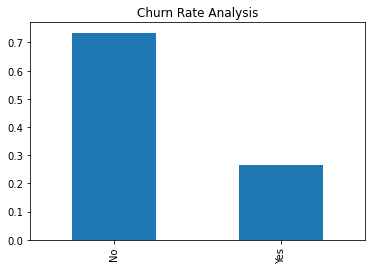

In [193]:
# check the target variable- to check whether the data set is balanced or not

(df['Churn'].value_counts()/len(df)).plot(kind='bar')
plt.title("Churn Rate Analysis")

Note:</br>
1. From the above, we can say that its an imbalanced dataset</br>
2. Churn value "No"(5174) will have dominating effect over "Yes"(1869) during prediction</br>
3. Imbalanced datasets can pose challenges during model training, as models may become biased towards the majority class</br>
4. In imbalanced datasets, models may be inclined to predict the majority class more frequently<br>
5. so we should handle it beofore or at the time of modeling

Text(0.5, 1.0, 'Customer Type Analysis')

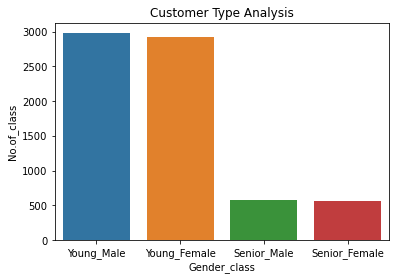

In [194]:
# Identify the customer based on Gender & Senior citizen
df_gen=df[['gender','SeniorCitizen']].value_counts()
df_gen=pd.DataFrame(df_gen)
df_gen['Gender_class']=['Young_Male','Young_Female','Senior_Male','Senior_Female']
df_gen.columns=['No.of_class', 'Gender_class']
sns.barplot(x=df_gen['Gender_class'],y=df_gen['No.of_class'])
plt.title('Customer Type Analysis')

Note:</br>
1. The graph indicates that the number of young customers is higher than that of senior citizens</br>
2. Within both the young and senior citizen classifications, the contributions of male and female customers are approximately equal</br>

Text(0.5, 1.0, 'Month-to-month contracts have a higher likelihood of churning')

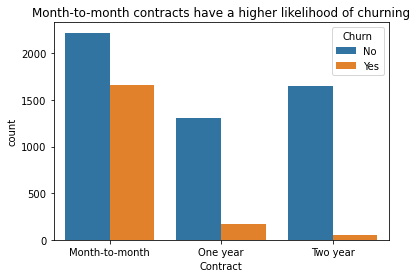

In [195]:
# Different types of contract
sns.countplot(df['Contract'],hue=df['Churn'])
plt.title('Month-to-month contracts have a higher likelihood of churning')

Note:</br>
1. From the above trend, Its clear that  higher churn rates are observed in the month-to-month contract type(higher likelihood of churning)</br>
2. also the graph indicates, there is lower churn associated with the 2-year contract 

Text(0.5, 1.0, 'Mode of Payment')

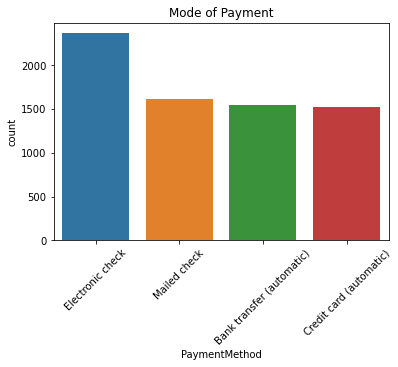

In [196]:
# Mode of payment by customers
#(df['PaymentMethod'].value_counts()/len(df))
sns.countplot(df['PaymentMethod'])
plt.xticks(rotation=45)
plt.title("Mode of Payment")

Note:</br>
1. 33% of customer prefer payment through Electronic check</br>
2. 22% of customers prefer Mailed check</br>
3. 21% are using either Bank trasfer or credit card</br>

In [197]:
# Lets Visualise correlation between numeric feature using heat-map

# we need to convert TotalCharges into a numeric column
# but there are some empty string in that columns
# get the index of rows having empty string in TotalCharge colum
empty_val=df[df['TotalCharges'].str.contains(" ")].index
# calculate TotalCharges from MonthlyCharges & Tenure COlumns
for i in empty_val:
    df.loc[i,'TotalCharges']=(df.loc[i,'MonthlyCharges']*df.loc[i,'tenure'])

In [198]:
# converting totalcharges column values from object to numeric 
df_corr=df[['tenure','MonthlyCharges','TotalCharges']]
df_corr['TotalCharges']=df_corr['TotalCharges'].apply(lambda x: float(x))

In [199]:
# to view the complete rows & columns of the data
pd.set_option('display.max.rows',7043)
pd.set_option('display.max.columns',21)

Text(0.5, 1.0, 'Correlation Between Numeric Features')

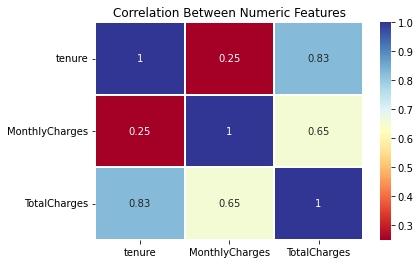

In [200]:
# Visualise correlation
corr_matrix=df_corr.corr()
# heatmap used to visualise correlation
sns.heatmap(corr_matrix,linewidths=0.2,annot=True,cmap='RdYlBu')
plt.title("Correlation Between Numeric Features")

Note:</br>
1. there is a high positive correlation etween Tenure & TotalCharges

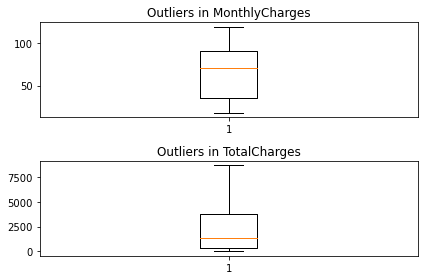

In [201]:
# Lets check outliers presence in monthly charge & total charge column
plt.subplot(2,1,1)
plt.boxplot(df_corr['MonthlyCharges'])
plt.title('Outliers in MonthlyCharges')

plt.subplot(2,1,2)
plt.boxplot(df_corr['TotalCharges'])
plt.title('Outliers in TotalCharges')

plt.tight_layout()

Note:</br>
1. No outliers found in the MothlyCharges & TotalCharges column

# Preprocessing

## Encoding

In [202]:
# check the data type of each column
df.dtypes

# convert TotalCharges into numeric type
df['TotalCharges']=df['TotalCharges'].apply(lambda x: float(x))

In [203]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [204]:
# check the null values

df.isna().sum()

# convert TotalCharges into numeric type
df['SeniorCitizen']=df['SeniorCitizen'].apply(lambda x: float(x))


Note:</br>
1. No missing values & outliers in the data

In [205]:
#lets convert binary columns to 0 & 1 using ordinal encoding

ordinl_enc={'Yes':1,'No':0}

cols=["Partner","Dependents","PhoneService","PaperlessBilling","Churn"]

for i in cols:
    df[i]=df[i].map(ordinl_enc)

In [206]:
# converting MultipleLines columns to binary 
df['MultipleLines'].value_counts()
ordinl_enc={'Yes':1,'No':0,'No phone service':0}
df['MultipleLines']=df['MultipleLines'].map(ordinl_enc)

In [207]:
# converting more columns to binary 

cols=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
ordinl_enc={'Yes':1,'No':0,'No internet service':0}

for i in cols:
    df[i]=df[i].map(ordinl_enc)

In [208]:
# converting Gender columns to binary 
df['gender'].value_counts()
ordinl_enc={'Male':1,'Female':0}
df['gender']=df['gender'].map(ordinl_enc)

In [209]:
# OneHot encoding for InternetService & Contract Columns

# create an instance of OneHot Encoder
Onehot=OneHotEncoder(sparse=False,drop='first')
# fit and trasforn the data
enc_df=Onehot.fit_transform(df[['InternetService','Contract','PaymentMethod']])
# get the transformed column names
cols=Onehot.get_feature_names_out()

# craete a new data frame for encoder output
df2=pd.DataFrame(enc_df,columns=cols)
df2.index=df.index

# concatenate the new dataframe to the original df
df=pd.concat([df,df2],axis=1)

# drop the legacy columns
df.drop(columns=['InternetService','Contract','PaymentMethod'],axis=1,inplace=True)

Note: Now, all the features were converted to numerical

Text(0.5, 1.0, 'Correlation Between Numeric Features')

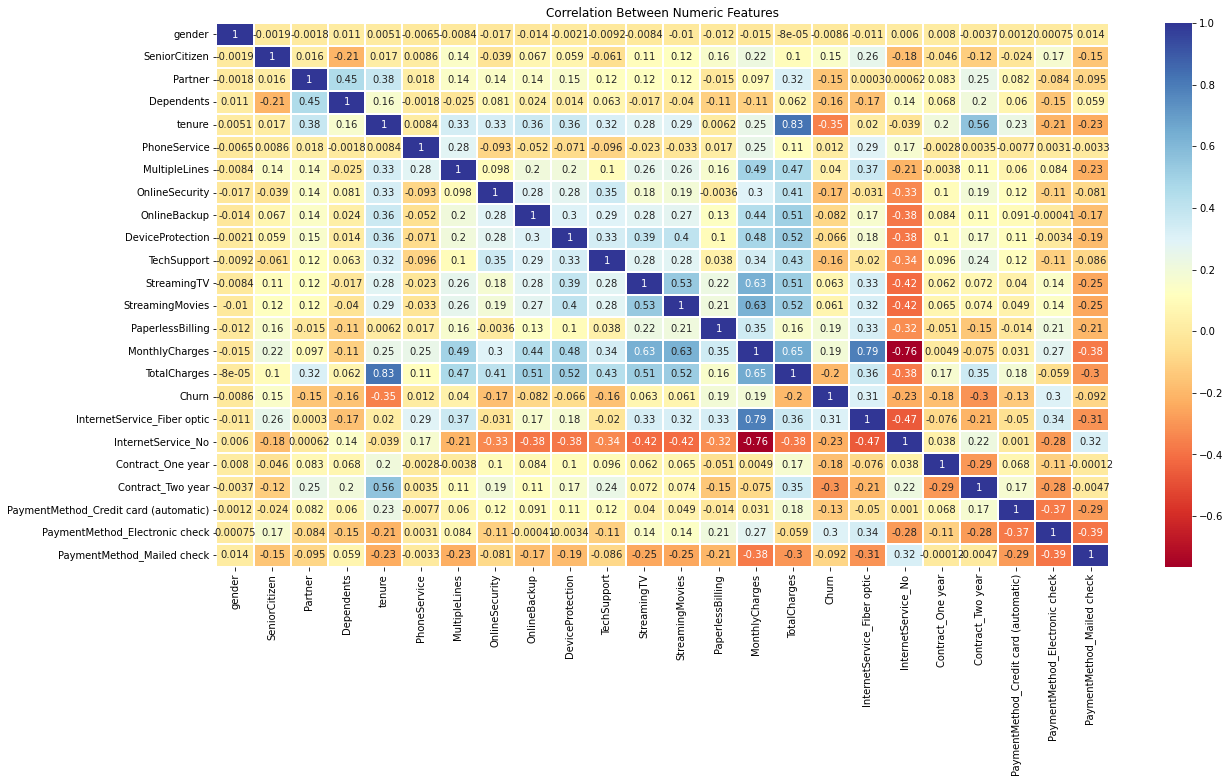

In [210]:
# Visualise correlation
corr_matrix=df.corr()
plt.figure(figsize=(20,10))
# heatmap used to visualise correlation
sns.heatmap(corr_matrix,linewidths=0.2,annot=True,cmap='RdYlBu')
plt.title("Correlation Between Numeric Features")

Note:</br>
1. Its clear from the above graph that there is a strong +ve correlation ebtween Total Charges & Tenure
2. Additionally, there is a strong negative correlation between Monthly Charges and InternetService_No 

## Feature Selection 

In [211]:
# move traget column to the last
cols=[x for x in df.columns if x!='Churn']

df=df[cols+['Churn']]

In [212]:
# since its a binary classifier we can use classfier algorithm to retrive the eature importance

# seperate predictors & traget variable
X=df.drop(['customerID','Churn'],axis=1)
y=df['Churn']

# split the dataset into train & test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Feature importance using RandomForest Classifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

# feature importance
rf.feature_importances_

# create a new DF
randomF_imp = pd.DataFrame({
    'Column_name': X.columns,
        'Importance_by_RF': rf.feature_importances_
})

In [213]:
randomF_imp.sort_values(by='Importance_by_RF',ascending=False)[:5]

,Column_name,Importance_by_RF
15,TotalCharges,0.192543
14,MonthlyCharges,0.181319
4,tenure,0.175294
16,InternetService_Fiber optic,0.040032
21,PaymentMethod_Electronic check,0.038087


In [214]:
# feature importance using linera model

#Logistic regression coefficients represent the change in the log-odds of the target variable for a one-unit change in the predictor variable. 
#These coefficients can be used to understand the impact of each variable on the target



# seperate predictors & target variable
X=df.drop(['customerID','Churn'],axis=1)
y=df['Churn']

# split the dataset into train & test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Feature importance using logistic regression
lg=LogisticRegression()


# Fit lg to the data and get the selected features
new_x = lg.fit(X_train,y_train)


# create a new DF
log_imp = pd.DataFrame({
    'Column_name': X.columns,
    'Importance_by_lg': abs(lg.coef_[0])
})

log_imp.sort_values(by='Importance_by_lg',ascending=False)[:5]

,Column_name,Importance_by_lg
19,Contract_Two year,0.786993
5,PhoneService,0.695002
17,InternetService_No,0.554772
7,OnlineSecurity,0.524489
10,TechSupport,0.480251


In [215]:
# taking the average of feature importance from RF & Logistic Regression models

# merge the 2 dtaframes that containing feature importances

feature_imp=pd.merge(left=randomF_imp,right=log_imp,on="Column_name",how='outer')
feature_imp["avg_imp"]=(feature_imp["Importance_by_RF"] + feature_imp["Importance_by_lg"])/2
feature_imp=feature_imp.sort_values(by="avg_imp",ascending=False)[:14]
# take only the column names 
feature_imp['Column_name'].unique()
cols=['Contract_Two year', 'PhoneService', 'InternetService_No',
       'OnlineSecurity', 'TechSupport', 'InternetService_Fiber optic',
       'Contract_One year', 'PaperlessBilling',
       'PaymentMethod_Electronic check', 'OnlineBackup', 'tenure',
       'SeniorCitizen', 'StreamingMovies', 'MonthlyCharges']
df_new=df[cols+['Churn']]

## Modeling

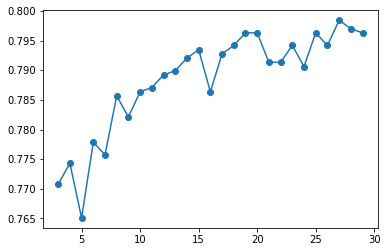

In [216]:
# finding best value for k in KNN
# seperate predictors & target variable
X=df_new.drop('Churn',axis=1)
y=df_new['Churn']

# split the dataset into train & test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
acc_values=[]
neighbors=np.arange(3,30)

# calculate accuracy for a list of k values
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc_values.append(accuracy_score(y_test,y_pred))
    
# plot accuracy vs k values
plt.plot(neighbors,acc_values,'-o')

Note: From the accuracy score graph, it is evident that the model achieves an accuracy of almost 80% when the value of k is set to 28.

Since our data is not balanced, we should handle it at the time of modeling. other wise it will overfit the data in favor of majority class. using SMOTE we can balance the train data.

In [217]:
#create a dictionary- for different model objects

models={"logistic_Regression": LogisticRegression(),
        "Random_Forest":RandomForestClassifier(random_state=42),
       "SVM":SVC(kernel='rbf'),
       "KNN":KNeighborsClassifier(n_neighbors=28,metric="minkowski"),
       "Decision_tree":DecisionTreeClassifier(random_state=42)}

In [218]:
# creating a function to calculate model performance
model_score_f1={}
model_score_cross={}
def calc_model_performance(models,X,y):
    for item,model in models.items():
        # split the dataset into train & test set
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
        # re_sample train dataset, using SMOTE oversampling method
        # it stands for synthetic minority oversampling technique
        # it simply duplicating examples from the minority class in the training dataset 
        smote=SMOTE()
        X_train_nw,y_train_nw=smote.fit_resample(X_train,y_train)
        #counter=Counter(y_train_nw)
        #print(counter)
        # fit the resampled data to model object
        model.fit(X_train_nw,y_train_nw)
        y_pred=model.predict(X_test)
        model_score_f1[item]=f1_score(y_test,y_pred)
        
        X_resampled=pd.concat([X_train_nw,X_test],axis=0)
        y_resampled=pd.concat([y_train_nw,y_test],axis=0)
        # calculate cross_validation_score
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        cross_score=cross_val_score(model,X_resampled,y_resampled,cv=kf,scoring='accuracy')
        model_score_cross[item]=cross_score.mean()
    # return the values
    return model_score_f1,model_score_cross

## Model Evaluation

In [219]:
# print f1-scores & cross validation scores
# seperate predictors & target variable
X=df_new.drop('Churn',axis=1)
y=df_new['Churn']
f1_score_,cross_validation_score=calc_model_performance(models,X,y)
print("f1_score",f1_score_)
print("cross_validation_score",cross_validation_score)

f1_score {'logistic_Regression': 0.6302895322939867, 'Random_Forest': 0.5836680053547522, 'SVM': 0.6153846153846154, 'KNN': 0.6061899679829241, 'Decision_tree': 0.5206508135168961}
cross_validation_score {'logistic_Regression': 0.7903975219411461, 'Random_Forest': 0.8312854930304594, 'SVM': 0.7402168301497161, 'KNN': 0.7491997934950956, 'Decision_tree': 0.7953536396489416}


Note:</br>
1. Among the models we tested, the logistic regression model stands out as the one with the best performance</br>
2. The logistic regression model has the highest F1 score, indicating a good balance between precision and recall. </br>
3. It also has a decent cross-validation score, suggesting good generalization performance on unseen data</br>
4. The logistic regression model shows consistent performance in both F1 score and cross-validation</br>

## Model Optimisation

In [220]:
# lets standardise the data and see the result

X=df_new.drop('Churn',axis=1)
y=df_new['Churn']

std=StandardScaler()
X_sc=std.fit_transform(X)

X=pd.DataFrame(X_sc,columns=X.columns)

f1_score_,cross_validation_score=calc_model_performance(models,X,y)
print("f1_score",f1_score_)
print("cross_validation_score",cross_validation_score)

f1_score {'logistic_Regression': 0.6414300736067298, 'Random_Forest': 0.6017925736235595, 'SVM': 0.6326086956521738, 'KNN': 0.6160081053698075, 'Decision_tree': 0.5238678090575276}
cross_validation_score {'logistic_Regression': 0.7659266907589055, 'Random_Forest': 0.8145585957666495, 'SVM': 0.7787299948373774, 'KNN': 0.7734641197728446, 'Decision_tree': 0.7551884357253484}


In [221]:
# lets normalise the data and see the result
# print f1-scores & cross validation scores
# seperate predictors & target variable
X=df_new.drop('Churn',axis=1)
y=df_new['Churn']

min_max=MinMaxScaler()
X_sc=min_max.fit_transform(X)

X=pd.DataFrame(X_sc,columns=X.columns)

f1_score_,cross_validation_score=calc_model_performance(models,X,y)
print("f1_score",f1_score_)
print("cross_validation_score",cross_validation_score)

f1_score {'logistic_Regression': 0.6408376963350786, 'Random_Forest': 0.5911949685534592, 'SVM': 0.628385698808234, 'KNN': 0.6157024793388429, 'Decision_tree': 0.5287081339712918}
cross_validation_score {'logistic_Regression': 0.7670624677336086, 'Random_Forest': 0.813216313887455, 'SVM': 0.7821373257614869, 'KNN': 0.7693340216830149, 'Decision_tree': 0.7719153329891585}


Note:</br>
In the above dataset, both normalisation & standardisation decrease logistic regression performance.

In [245]:
# Hyper parameter tuning the Logistic Regression model


X=df_new.drop('Churn',axis=1)
y=df_new['Churn']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

 
smote=SMOTE()
X_train_nw,y_train_nw=smote.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_train_nw,X_test],axis=0)
y_resampled=pd.concat([y_train_nw,y_test],axis=0)


parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
# Define the F1 score as the scoring metric
scorer = make_scorer(f1_score)

clf = GridSearchCV(estimator=LogisticRegression(),
             param_grid=parameters,
                  scoring=scorer,
                  cv=5)
clf.fit(X_resampled, y_resampled)
# Print the best hyperparameters
print("Best Hyperparameters:", clf.best_params_)

Best Hyperparameters: {'C': 0.001, 'penalty': 'none'}


Note: Best Hyperparameters for this problem are: {'C': 0.001, 'penalty': 'none'} from GridsearchCV

In [246]:
# lets make prediction using this best parameters

# Make predictions on the test set using the best model
y_pred = clf.best_estimator_.predict(X_test)
print("F1 Score",f1_score(y_test,y_pred))

# calculate cross_validation_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lg=LogisticRegression(C=0.001, penalty='none')
cross_score=cross_val_score(lg,X_resampled,y_resampled,cv=kf,scoring='accuracy')
print("Cross Validation SCore Score",cross_score.mean())

F1 Score 0.6399082568807339
Cross Validation SCore Score 0.7918430562725864


## Machine Learning Pipeline